# From data analysis to Dash Boarding

## This involves several steps

### 1. Load the data
### 2. View the data
### 3. Clean the data
### 4. Visualize and Analyze the data
### 5. Featurize the data
### 6. Get final dataset for Dashboarding and Building ML model 

## 1.Load the data
#### First import the necessary libraries
#### You can import the data in several ways like from local system having different file formats, from sql databases etc

In [88]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [48]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

In [5]:
df = pd.read_csv("data/mobile_train.csv")

## 2.View the data

In [16]:
print(df.shape)

(2000, 21)


In [8]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [13]:
df.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0


In [18]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


## 3.Clean the data
#### These steps deals with HANDLING 
##### 1.missing values    2.duplicate values     3.outliers     4.data type conversion

In [20]:
 null_count = df.isnull().sum()

# Display the null count
print(null_count)

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


In [22]:
duplicates = df.duplicated()

# Display the rows that are duplicates
print(df[duplicates])

# Check for duplicates based on specific columns
#duplicates_specific_columns = df.duplicated(subset=['column1', 'column2'])

Empty DataFrame
Columns: [battery_power, blue, clock_speed, dual_sim, fc, four_g, int_memory, m_dep, mobile_wt, n_cores, pc, px_height, px_width, ram, sc_h, sc_w, talk_time, three_g, touch_screen, wifi, price_range]
Index: []

[0 rows x 21 columns]


In [24]:
def find_outliers(df):
    # Calculate the IQR for all numerical features
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1

    # Identify outliers based on IQR for each feature
    outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))

    # Get a list of features with outliers
    features_with_outliers = outliers.any()

    return features_with_outliers.index[features_with_outliers].tolist()


outliers = find_outliers(df)
print(outliers)

['fc', 'px_height', 'three_g']


In [33]:

def count_outliers(df):
    # Calculate the IQR for all numerical features
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1

    # Identify outliers based on IQR for each feature
    outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))

    # Count the number of outliers for each feature
    outliers_count = outliers.sum()

    return outliers_count

# Example usage:
# Assuming 'df' is your DataFrame
# Replace it with the actual DataFrame name
# For example, df = pd.read_csv('your_file.csv')

outliers_count_per_feature = count_outliers(df)
print("Number of outliers per feature:")
print(outliers_count_per_feature)


Number of outliers per feature:
battery_power      0
blue               0
clock_speed        0
dual_sim           0
fc                18
four_g             0
int_memory         0
m_dep              0
mobile_wt          0
n_cores            0
pc                 0
px_height          2
px_width           0
ram                0
sc_h               0
sc_w               0
talk_time          0
three_g          477
touch_screen       0
wifi               0
price_range        0
dtype: int64


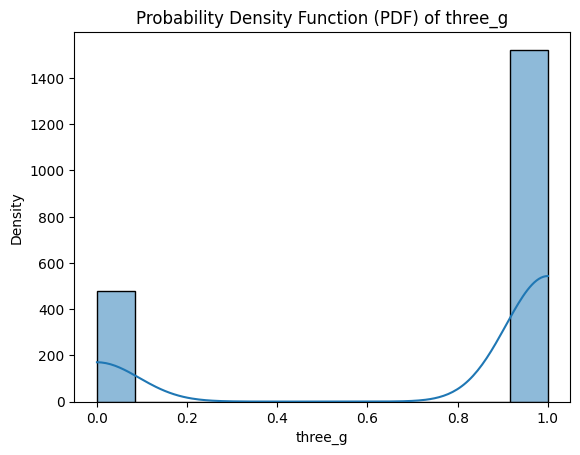

In [26]:
feature_name = "three_g"

# Check if the feature exists in the DataFrame
if feature_name in df.columns:
    # Plot the PDF using seaborn
    sns.histplot(df[feature_name], kde=True)
    plt.title(f'Probability Density Function (PDF) of {feature_name}')
    plt.xlabel(feature_name)
    plt.ylabel('Density')
    plt.show()
else:
    print(f'The feature "{feature_name}" does not exist in the DataFrame.')

In [40]:
def remove_outliers_for_feature(df, feature_name):
    # Check if the feature exists in the DataFrame
    if feature_name in df.columns:
        # Calculate the IQR for the specified feature
        Q1 = df[feature_name].quantile(0.25)
        Q3 = df[feature_name].quantile(0.75)
        IQR = Q3 - Q1

        # Identify outliers based on IQR for the specified feature
        outliers = (df[feature_name] < (Q1 - 1.5 * IQR)) | (df[feature_name] > (Q3 + 1.5 * IQR))

        # Remove rows with outliers for the specified feature
        df_no_outliers = df[~outliers]

        return df_no_outliers
    else:
        print(f'The feature "{feature_name}" does not exist in the DataFrame.')
        return df

feature_to_remove_outliers1 = "fc"
feature_to_remove_outliers2 = "px_height"

df1 = remove_outliers_for_feature(df, feature_to_remove_outliers1)
df = remove_outliers_for_feature(df1, feature_to_remove_outliers2)


In [41]:
df.shape

(1980, 21)

In [43]:
data_types = df.dtypes
print("Data Types of Attributes:")
print(data_types)

Data Types of Attributes:
battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object


## 4.Visualize and analyze the data

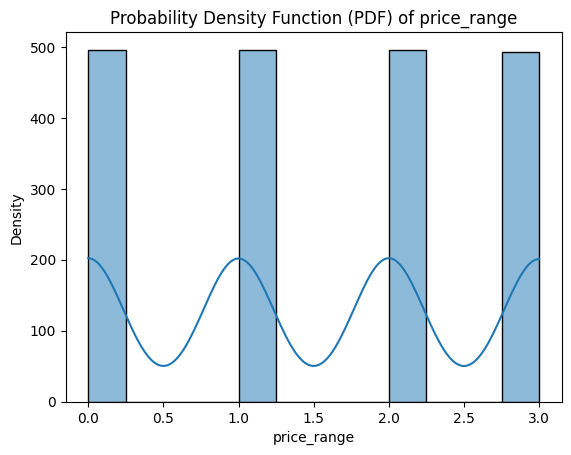

In [47]:
feature_name = "price_range"
sns.histplot(df[feature_name], kde=True)
plt.title(f'Probability Density Function (PDF) of {feature_name}')
plt.xlabel(feature_name)
plt.ylabel('Density')
plt.show()

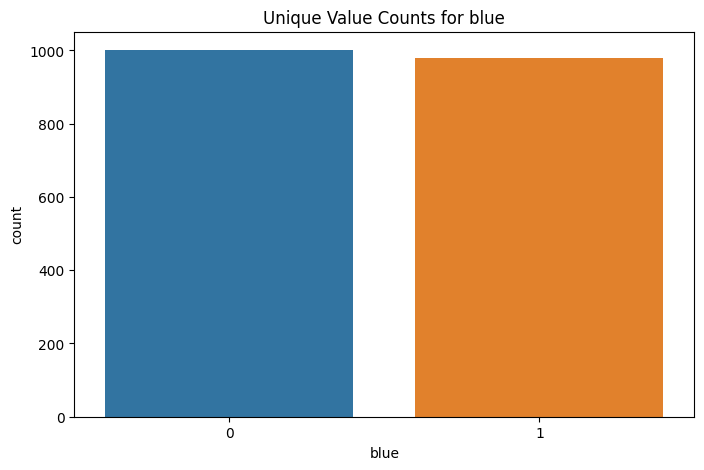

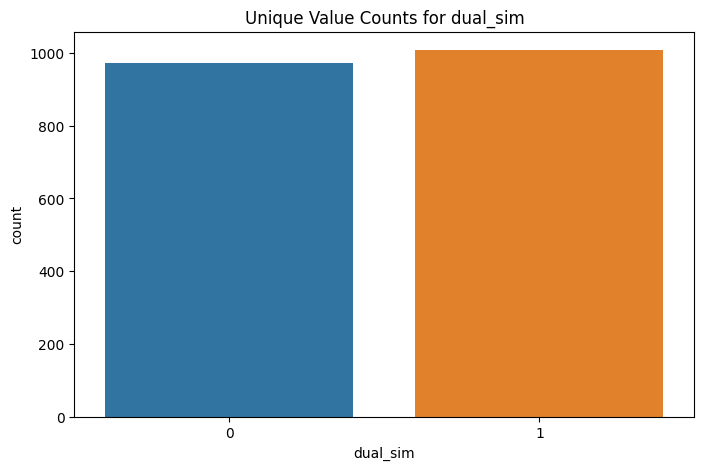

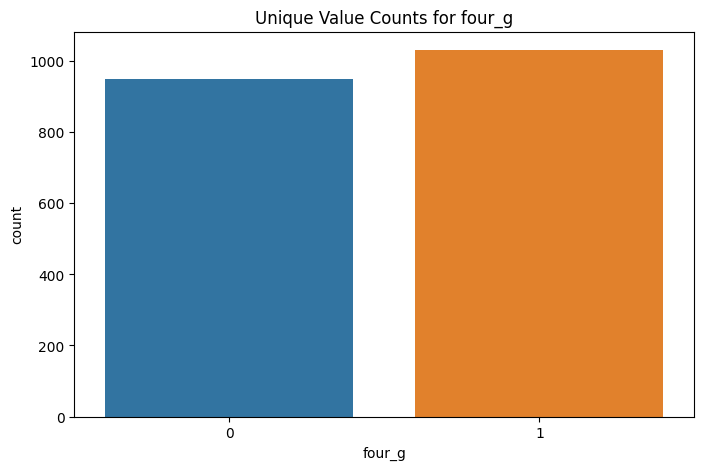

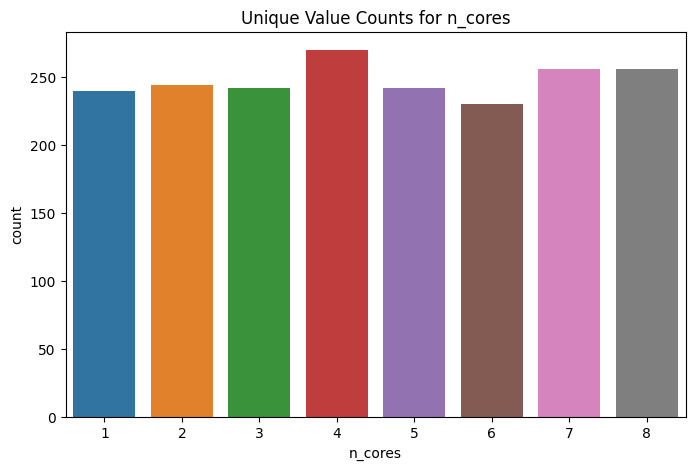

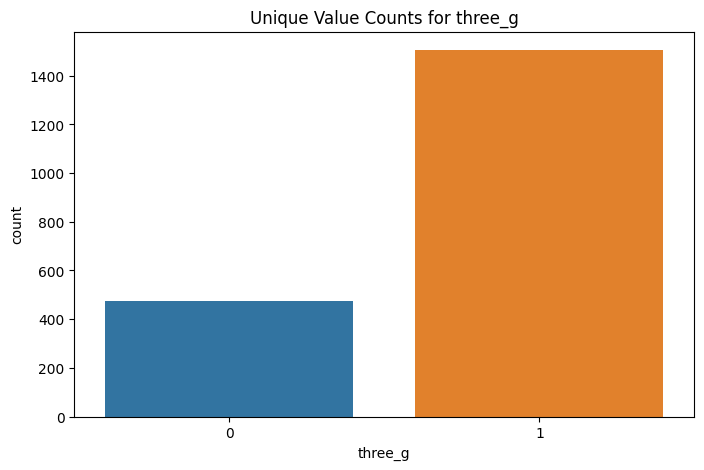

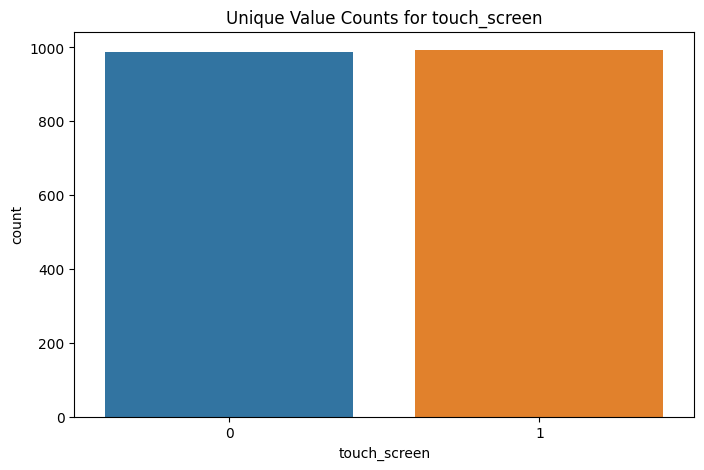

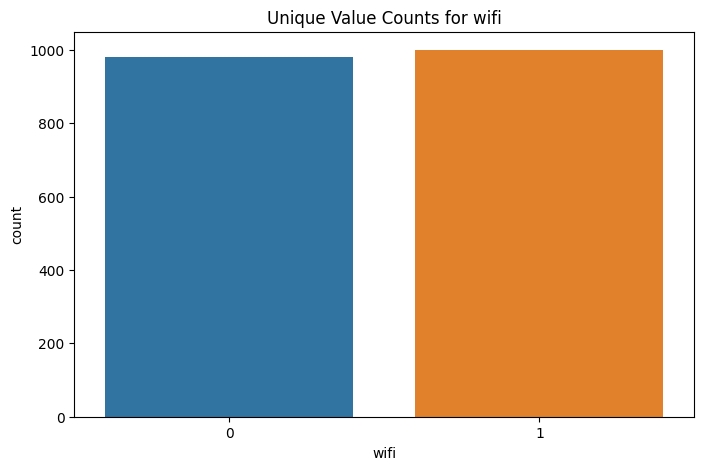

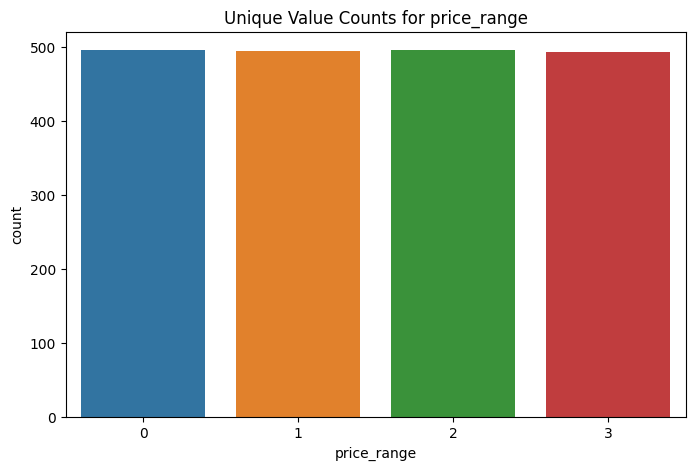

In [65]:
for column in df.columns:
    if df[column].nunique() < 10:  # To avoid clutter for features with too many unique values
        plt.figure(figsize=(8, 5))
        sns.countplot(x=column, data=df)
        plt.title(f'Unique Value Counts for {column}')
        plt.show()

## 5. Featurize the data
#### You can reduce the dimension of the data or add the derived features from the dataset that are useful to build the model
### Applying PCA

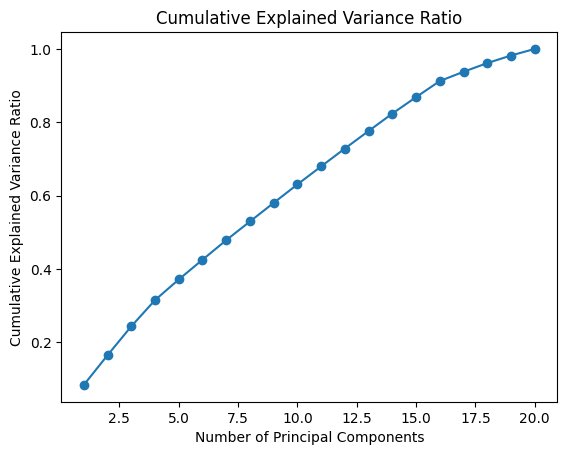

DataFrame after PCA:
           PC1       PC2       PC3  price_range
0     0.282951  2.327082 -0.980716          1.0
1    -1.990627 -0.472598  0.457009          2.0
2    -1.352285 -0.047906  0.027417          2.0
3    -1.136680  0.513770  1.517905          2.0
4     1.628206 -1.170790 -0.060809          1.0
...        ...       ...       ...          ...
1995       NaN       NaN       NaN          0.0
1996       NaN       NaN       NaN          2.0
1997       NaN       NaN       NaN          3.0
1998       NaN       NaN       NaN          0.0
1999       NaN       NaN       NaN          3.0

[2000 rows x 4 columns]


In [49]:
# Assuming 'df' is your DataFrame
# Replace it with the actual DataFrame name
# For example, df = pd.read_csv('your_file.csv')

# Separate features and target variable
X = df.drop(columns=['price_range'])
y = df['price_range']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = explained_variance_ratio.cumsum()

# Plot explained variance ratio
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.title('Cumulative Explained Variance Ratio')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.show()

# Choose the number of components based on the plot or a desired threshold
# For example, selecting components that explain 95% of the variance
num_components = (cumulative_variance_ratio >= 0.95).sum()

# Apply PCA with the chosen number of components
pca = PCA(n_components=num_components)
X_pca = pca.fit_transform(X_scaled)

# Create a new DataFrame with the principal components
columns_pca = [f'PC{i}' for i in range(1, num_components + 1)]
df_pca = pd.DataFrame(data=X_pca, columns=columns_pca)

# Concatenate the principal components DataFrame with the target variable
df_final = pd.concat([df_pca, y], axis=1)

# Display the resulting DataFrame after PCA
print("DataFrame after PCA:")
print(df_final)

In [50]:
df_final

,PC1,PC2,PC3,price_range
0,0.282951,2.327082,-0.980716,1.0
1,-1.990627,-0.472598,0.457009,2.0
2,-1.352285,-0.047906,0.027417,2.0
3,-1.136680,0.513770,1.517905,2.0
4,1.628206,-1.170790,-0.060809,1.0
...,...,...,...,...
1995,NaN,NaN,NaN,0.0
1996,NaN,NaN,NaN,2.0
1997,NaN,NaN,NaN,3.0
1998,NaN,NaN,NaN,0.0


In [52]:
null_cunt = df_final.isnull().sum()

# Display the null count
print(null_cunt)

PC1            20
PC2            20
PC3            20
price_range    20
dtype: int64


## 6. Get final dataset for Dashboarding and Building ML model

In [53]:
df_final_pca = df_final.dropna()


X = df.drop(columns=['price_range'])
y = df['price_range']

In [55]:
print(X.shape)
print(y.shape)

df_final_pca.shape

(1980, 20)
(1980,)


(1960, 4)

In [57]:
unique_values = df['price_range'].unique()

# Display the unique values
print(f"Unique values of {'price_range'}:")
print(unique_values)

Unique values of price_range:
[1 2 3 0]


# APPLY ML ALGORITHMS ON DATASET

### Since y is categorical use classification algorithms

In [89]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for some algorithms)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# K-Nearest Neighbors (KNN)
k_neighbors = 3
knn_classifier = KNeighborsClassifier(n_neighbors=k_neighbors)
knn_classifier.fit(X_train_scaled, y_train)
y_pred_knn = knn_classifier.predict(X_test_scaled)

# Random Forest
random_forest_classifier = RandomForestClassifier(random_state=42)
random_forest_classifier.fit(X_train_scaled, y_train)
y_pred_rf = random_forest_classifier.predict(X_test_scaled)

# Support Vector Machine (SVM)
svm_classifier = SVC(random_state=42)
svm_classifier.fit(X_train_scaled, y_train)
y_pred_svm = svm_classifier.predict(X_test_scaled)

# Gradient Boosting
gradient_boosting_classifier = GradientBoostingClassifier(random_state=42)
gradient_boosting_classifier.fit(X_train_scaled, y_train)
y_pred_gb = gradient_boosting_classifier.predict(X_test_scaled)

# Evaluate the models
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    classification_rep = classification_report(y_true, y_pred)

    print(f"{model_name} - Accuracy: {accuracy:.2f}")
    print(f"{model_name} - Classification Report:")
    print(classification_rep)
    print("\n")

evaluate_model(y_test, y_pred_knn, "K-Nearest Neighbors (KNN)")
evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_svm, "Support Vector Machine (SVM)")
evaluate_model(y_test, y_pred_gb, "Gradient Boosting")


K-Nearest Neighbors (KNN) - Accuracy: 0.47
K-Nearest Neighbors (KNN) - Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.74      0.63       107
           1       0.30      0.35      0.32        97
           2       0.28      0.24      0.26        86
           3       0.83      0.50      0.62       106

    accuracy                           0.47       396
   macro avg       0.49      0.46      0.46       396
weighted avg       0.50      0.47      0.47       396



Random Forest - Accuracy: 0.87
Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       107
           1       0.82      0.79      0.81        97
           2       0.76      0.79      0.78        86
           3       0.95      0.91      0.93       106

    accuracy                           0.87       396
   macro avg       0.86      0.86      0.86       396
weighted avg       

### You can apply ML algorithms on PCA data

In [67]:
# df_final_pca

In [68]:
# X_new = df_final_pca.drop(columns=['price_range'])
# y_new = df_final_pca['price_range']


# # Split the data into training and testing sets
# X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.2, random_state=42)

# # Standardize the features (important for some algorithms)
# scaler_new = StandardScaler()
# X_train_scaled_new = scaler_new.fit_transform(X_train_new)
# X_test_scaled_new = scaler_new.transform(X_test_new)

# # K-Nearest Neighbors (KNN)
# k_neighbors_new = 3
# knn_classifier_new = KNeighborsClassifier(n_neighbors=k_neighbors_new)
# knn_classifier_new.fit(X_train_scaled_new, y_train_new)
# y_pred_knn_new = knn_classifier_new.predict(X_test_scaled_new)

# # Random Forest
# random_forest_classifier_new = RandomForestClassifier(random_state=42)
# random_forest_classifier_new.fit(X_train_scaled_new, y_train_new)
# y_pred_rf_new = random_forest_classifier_new.predict(X_test_scaled_new)

# # Support Vector Machine (SVM)
# svm_classifier_new = SVC(random_state=42)
# svm_classifier_new.fit(X_train_scaled_new, y_train_new)
# y_pred_svm_new = svm_classifier_new.predict(X_test_scaled_new)

# # Gradient Boosting
# gradient_boosting_classifier_new = GradientBoostingClassifier(random_state=42)
# gradient_boosting_classifier_new.fit(X_train_scaled_new, y_train_new)
# y_pred_gb_new = gradient_boosting_classifier_new.predict(X_test_scaled_new)

# # Evaluate the models
# def evaluate_model_new(y_true_new, y_pred_new, model_name_new):
#     accuracy_new = accuracy_score(y_true_new, y_pred_new)
#     classification_rep_new = classification_report(y_true_new, y_pred_new)

#     print(f"{model_name_new} - Accuracy: {accuracy_new:.2f}")
#     print(f"{model_name_new} - Classification Report:")
#     print(classification_rep_new)
#     print("\n")

# evaluate_model_new(y_test_new, y_pred_knn_new, "K-Nearest Neighbors (KNN)")
# evaluate_model_new(y_test_new, y_pred_rf_new, "Random Forest")
# evaluate_model_new(y_test_new, y_pred_svm_new, "Support Vector Machine (SVM)")
# evaluate_model_new(y_test_new, y_pred_gb_new, "Gradient Boosting")


In [71]:
X = df.drop(columns=['price_range']).values
y = df['price_range'].values

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

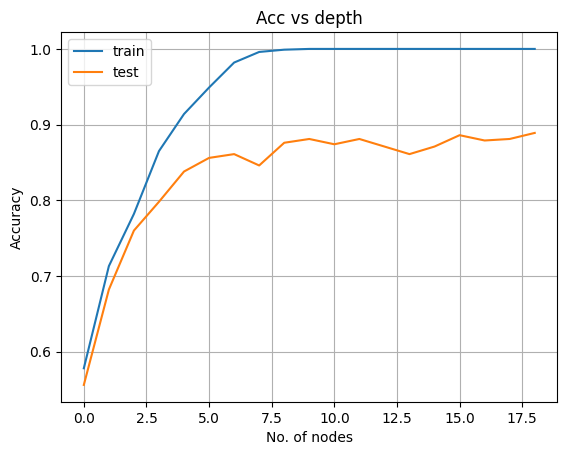

In [72]:
train_list, test_list = [], []
for i in range(1, 20):
    DT_model = RandomForestClassifier(criterion='entropy', max_depth=i)
    DT_model.fit(X_train, y_train)
    train_list.append(round(DT_model.score(X_train, y_train), 3))
    test_list.append(round(DT_model.score(X_test, y_test), 3))
plt.plot(train_list, label='train')
plt.plot(test_list, label='test')
plt.title('Acc vs depth')
plt.ylabel('Accuracy')
plt.xlabel('No. of nodes')
plt.legend()
plt.grid()
plt.show()

In [75]:
train_list, test_list, depth_list, max_features_list = [], [], [], []
for d in range(5, 15):
    for mf in ['sqrt', 'log2', None]:
        DT_model = DecisionTreeClassifier(criterion='entropy', max_depth=d, random_state=0)
        DT_model.fit(X_train, y_train)
        y_pred = DT_model.predict(X_test)
        train_list.append(round(DT_model.score(X_train, y_train), 3))
        test_list.append(round(DT_model.score(X_test, y_test), 3))
        depth_list.append(d)
        max_features_list.append(mf)
output = pd.DataFrame({'train': train_list, 'test': test_list, 'depth': depth_list, 'max_features': max_features_list})

In [77]:
output

,train,test,depth,max_features
0,0.878,0.808,5,sqrt
1,0.878,0.808,5,log2
2,0.878,0.808,5,None
3,0.922,0.843,6,sqrt
4,0.922,0.843,6,log2
5,0.922,0.843,6,None
6,0.959,0.846,7,sqrt
7,0.959,0.846,7,log2
8,0.959,0.846,7,None
9,0.986,0.864,8,sqrt
